In [2]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np


Using TensorFlow backend.


In [3]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10  # number of outputs = number of digits
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

K.set_image_dim_ordering("th")
#(depth, input_depth, rows, cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255  

In [25]:
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


60000 train samples
10000 test samples


In [26]:
print(X_train.shape)

(60000, 1, 28, 28)


In [27]:
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)


In [30]:
model = Sequential()
# CONV => RELU => POOL
model.add(Conv2D(20, kernel_size=5, padding="same",input_shape=INPUT_SHAPE))

model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [31]:
model.add(Conv2D(50, kernel_size=5, padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


In [32]:
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

In [33]:
model.add(Dense(NB_CLASSES))
model.add(Activation("softmax"))


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 20, 28, 28)        520       
_________________________________________________________________
activation_12 (Activation)   (None, 20, 28, 28)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 20, 14, 14)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 14, 14)        25050     
_________________________________________________________________
activation_13 (Activation)   (None, 50, 14, 14)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 7, 7)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2450)              0         
__________

In [35]:
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,metrics=["accuracy"])

In [36]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, 
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 284s 6ms/step - loss: 0.1801 - acc: 0.9475 - val_loss: 0.0639 - val_acc: 0.9798
Epoch 2/20
48000/48000 [==============================] - 341s 7ms/step - loss: 0.0485 - acc: 0.9850 - val_loss: 0.0410 - val_acc: 0.9889
Epoch 3/20
48000/48000 [==============================] - 365s 8ms/step - loss: 0.0330 - acc: 0.9900 - val_loss: 0.0395 - val_acc: 0.9883
Epoch 4/20
48000/48000 [==============================] - 453s 9ms/step - loss: 0.0246 - acc: 0.9917 - val_loss: 0.0335 - val_acc: 0.9898
Epoch 5/20
48000/48000 [==============================] - 586s 12ms/step - loss: 0.0177 - acc: 0.9944 - val_loss: 0.0400 - val_acc: 0.9897
Epoch 6/20
48000/48000 [==============================] - 445s 9ms/step - loss: 0.0148 - acc: 0.9952 - val_loss: 0.0340 - val_acc: 0.9905
Epoch 7/20
48000/48000 [==============================] - 375s 8ms/step - loss: 0.0122 - acc: 0.9962 - val_loss: 0.0395 -

In [37]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[1])

10000/10000 [==============================] - 38s 4ms/step

Test score: 0.9904


In [38]:
import matplotlib.pyplot as plt

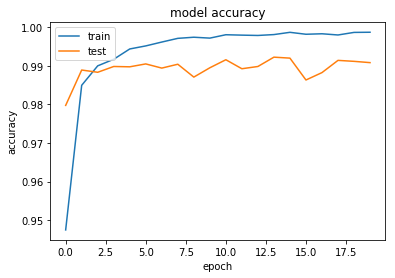

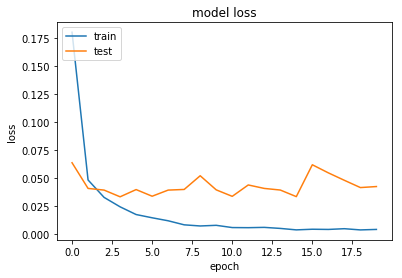

In [39]:

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()